# 🎯 Неделя 1. Семинар 1.

**Сегодня в программе:**

0. Основные термины и особенности при работе с данными в ML.
1. Загрузка данных и первичное знакомство с ними.
2. Преобразование данных: расширение и feature engineering.
3. EDA.
4. Очистка данных.

```
1. Обработка пропусков, выбросов и очистка (неинф., мультиколл., утечка, дубли).
2. Методы кодирования признаков.
3. Методы масштабирования признаков.
4. Отбор признаков и feature engineering.
```

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from  sklearn import preprocessing

## 🟢 0. Основные термины и особенности при работе с данными в ML

### Признаки и таргет
В большинстве аналитических и ML-задач выделяют:
- **таргет (target)** — целевая переменная, которую мы хотим предсказать (обычно один столбец);
- **признаки (features)** — все остальные переменные, которые используются для предсказания таргета.



Виды признаков:

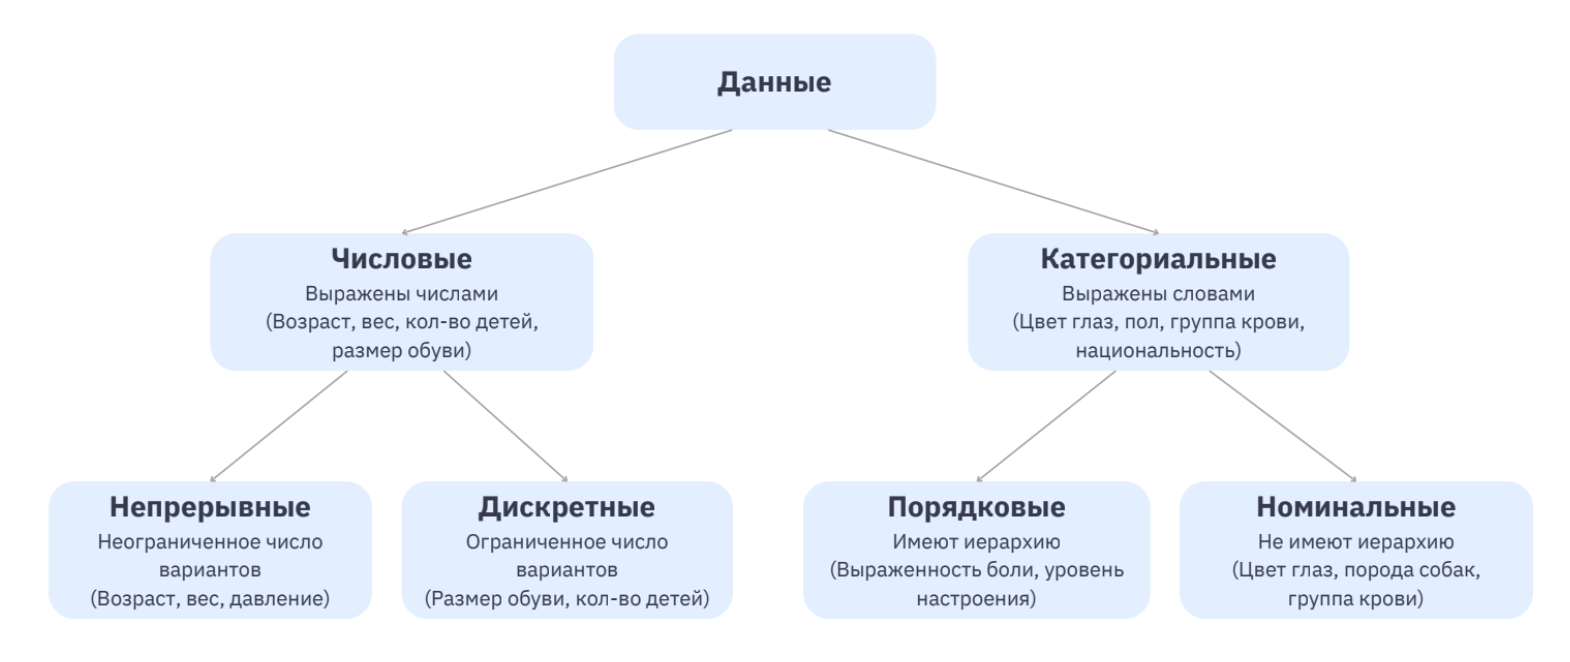

### Суть машинного обучения
**Цель ML** — найти максимально точное отображение из признаков в таргет; т.е., по сути, функцию $f$ такую, чтобы $f(features)\approx target$.

> ⚠️ Важный момент: **все признаки должны быть числовыми** перед подачей на вход модели - поэтому категориальные и текстовые данные предварительно кодируются.

### Ещё термины
- **Датасет (dataset) / датафрейм (dataframe)** — набор данных для анализа или обучения моделей (данные могут быть не только табличными! например, бывают картиночные и текстовые датасеты).
- **Пайплайн (pipeline)** — последовательность шагов обработки данных и обучения модели.
- **ML (Machine Learning)** — машинное обучение.
- **DL (Deep Learning)** — глубокое обучение (модели основаны на нейросетях).

### Типовой пайплайн решения ML-задач
Независимо от конкретной задачи, всегда выполняются следующие этапы:

1. Загрузка данных и первичное знакомство с ними.
2. Преобразование данных: расширение и feature engineering.
3. EDA — разведывательный анализ (математика + визуализация -> выводы)
4. Очистка данных.
5. Моделирование, эксперименты с оценкой качества и интерпретацией результатов.
6. Деплоймент и использование модели в production.

## 🟢 1. Загрузка данных и первичное знакомство с ними.

На этом этапе важно понять структуру данных, корректность загрузки и наличие очевидных проблем.  
Для этого чаще всего используют базовые методы `pandas`:

- **`.head()`**  
  Быстрый просмотр первых строк таблицы.  
  Позволяет убедиться, что данные загрузились корректно, столбцы названы ожидаемо, значения выглядят адекватно.

- **`.info()`**  
  Показывает:
  - типы данных признаков;
  - количество непустых значений в каждом столбце.  
  Используется для выявления пропусков и ошибок в типах данных. ** От пропусков и ошибок надо избавляться!**

- **`.describe()`**  
  Выводит основные статистики числовых признаков  
  (среднее, стандартное отклонение, минимумы, максимумы, квартили).  
  Помогает обнаружить выбросы и подозрительные значения. **От выбросов и подозрительных значений надо избавляться!**

- **`.shape`**  
  Размер таблицы в формате `(количество строк, количество столбцов)`.  
  Используется для понимания масштаба данных и проверки полноты загрузки.

- **Проверка диапазона дат (если есть временной признак)**  
  Анализ минимальной и максимальной даты позволяет убедиться,
  что данные покрывают ожидаемый временной интервал и не были обрезаны при загрузке.


In [170]:
penguins_data = sns.load_dataset('penguins')

X = penguins_data.drop('species', axis=1) # выделим признаки  (drop удаление указанного столбца axis=1 - столбец)
y = penguins_data['species'] # выделим таргет

print(penguins_data.shape)
penguins_data.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [171]:
penguins_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    str    
dtypes: float64(4), str(3)
memory usage: 19.0 KB


In [172]:
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [173]:
penguins_data.describe(include=['object', 'string'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


## 🟢 2. Преобразование данных.

**Цель:** выполнить очевидные преобразования признаков – в первую очередь для EDA + сразу можно подумать про подготовку к моделированию.

**На что обратить внимание:**
- типы данных (видели в `info()`): иногда числа/словари могут быть строками
- мультипризнаки: в одном столбце сразу несколько характеристик
- разные размерности по строкам: скорость в м/с и км/ч
- можно проверить ошибки: для числовых признаков увидим в describe, для категориальных вывести `unique()`, проверить смысл (напр., “покупка без клика”)
+ здесь же создаём/собираем доп. признаки, включая расширение данных и методы feature engineering

**Примеры feature engineering:**
- знаем проделанный путь и потраченное время => можно рассчитать среднюю скорость
- знаем полную дату => можно выделить час, день недели, месяц, год
- преобразование категориальных признаков с большим кол-вом уникальных категорий в более крупные группы (экспертная группировка, кластеризация, hashing trick ...)


In [174]:
# проверка категориальных
cat_cols = ["species", "island", "sex"]

for col in cat_cols:
    print(col, penguins_data[col].unique())

species <StringArray>
['Adelie', 'Chinstrap', 'Gentoo']
Length: 3, dtype: str
island <StringArray>
['Torgersen', 'Biscoe', 'Dream']
Length: 3, dtype: str
sex <StringArray>
['Male', 'Female', nan]
Length: 3, dtype: str


In [175]:
# создадим признак соотношения размера клюва
penguins_data["bill_ratio"] = (
    penguins_data["bill_length_mm"] / penguins_data["bill_depth_mm"]
)

In [176]:
# переведём массу из граммов в килограммы (пример)
penguins_data["body_mass_kg"] = penguins_data["body_mass_g"] / 1000
penguins_data.drop("body_mass_g", axis=1, inplace=True)

In [177]:
# тяжёлый или нет?
penguins_data["is_heavy"] = (
    penguins_data["body_mass_kg"] > penguins_data["body_mass_kg"].median()
).astype(int)

In [178]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,bill_ratio,body_mass_kg,is_heavy
0,Adelie,Torgersen,39.1,18.7,181.0,Male,2.090909,3.75,0
1,Adelie,Torgersen,39.5,17.4,186.0,Female,2.270115,3.80,0
2,Adelie,Torgersen,40.3,18.0,195.0,Female,2.238889,3.25,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,Female,1.901554,3.45,0


## 🟢 3. EDA

Основная цель разведывательного анализа данных — понять структуру данных, выявить зависимости между признаками и обнаружить потенциальные проблемы до этапа моделирования.

НАИБОЛЕЕ важно:
- проверить **мультиколлинеарность** признаков;
- изучить **распределения** и заодно парные зависимости (`pairplot` в помощь);
- обнаружить аномалии и ошибки в данных.

Результаты EDA во многом определяют решения на следующем этапе — **очистке данных**.

### Мультиколлинеарность

Мультиколлинеарность — это сильная линейная зависимость между признаками.

**Как обнаруживается:**
- строится корреляционная матрица;
- визуализируется с помощью карты корреляций.

**Практическое правило:**
- если корреляция между двумя признаками по модулю превышает ~0.7,  
  признаки считаются сильно зависимыми.
- удалить один из сильно коррелирующих признаков  
  (обычно менее полезный - решаем отбором признаков или по корреляции с таргетом).

### Распределения

**Используется для:**
- выбора способа масштабирования  
  (стандартизация, нормализация, лог-преобразование и т.д. - про это далее);
- определения порогов для удаления или обработки выбросов;
- обнаружения аномалий и ошибок в данных.



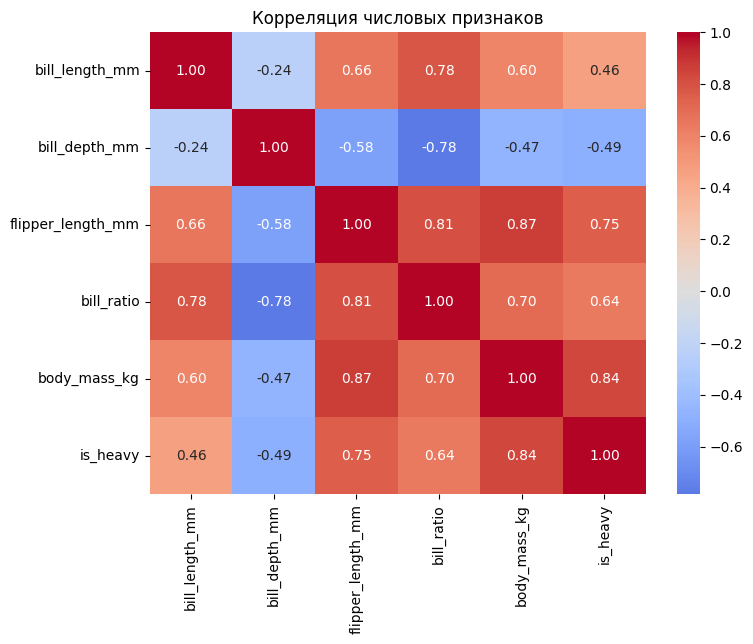

In [179]:
num_cols = penguins_data.select_dtypes(include="number")

corr = num_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Корреляция числовых признаков")
plt.show()

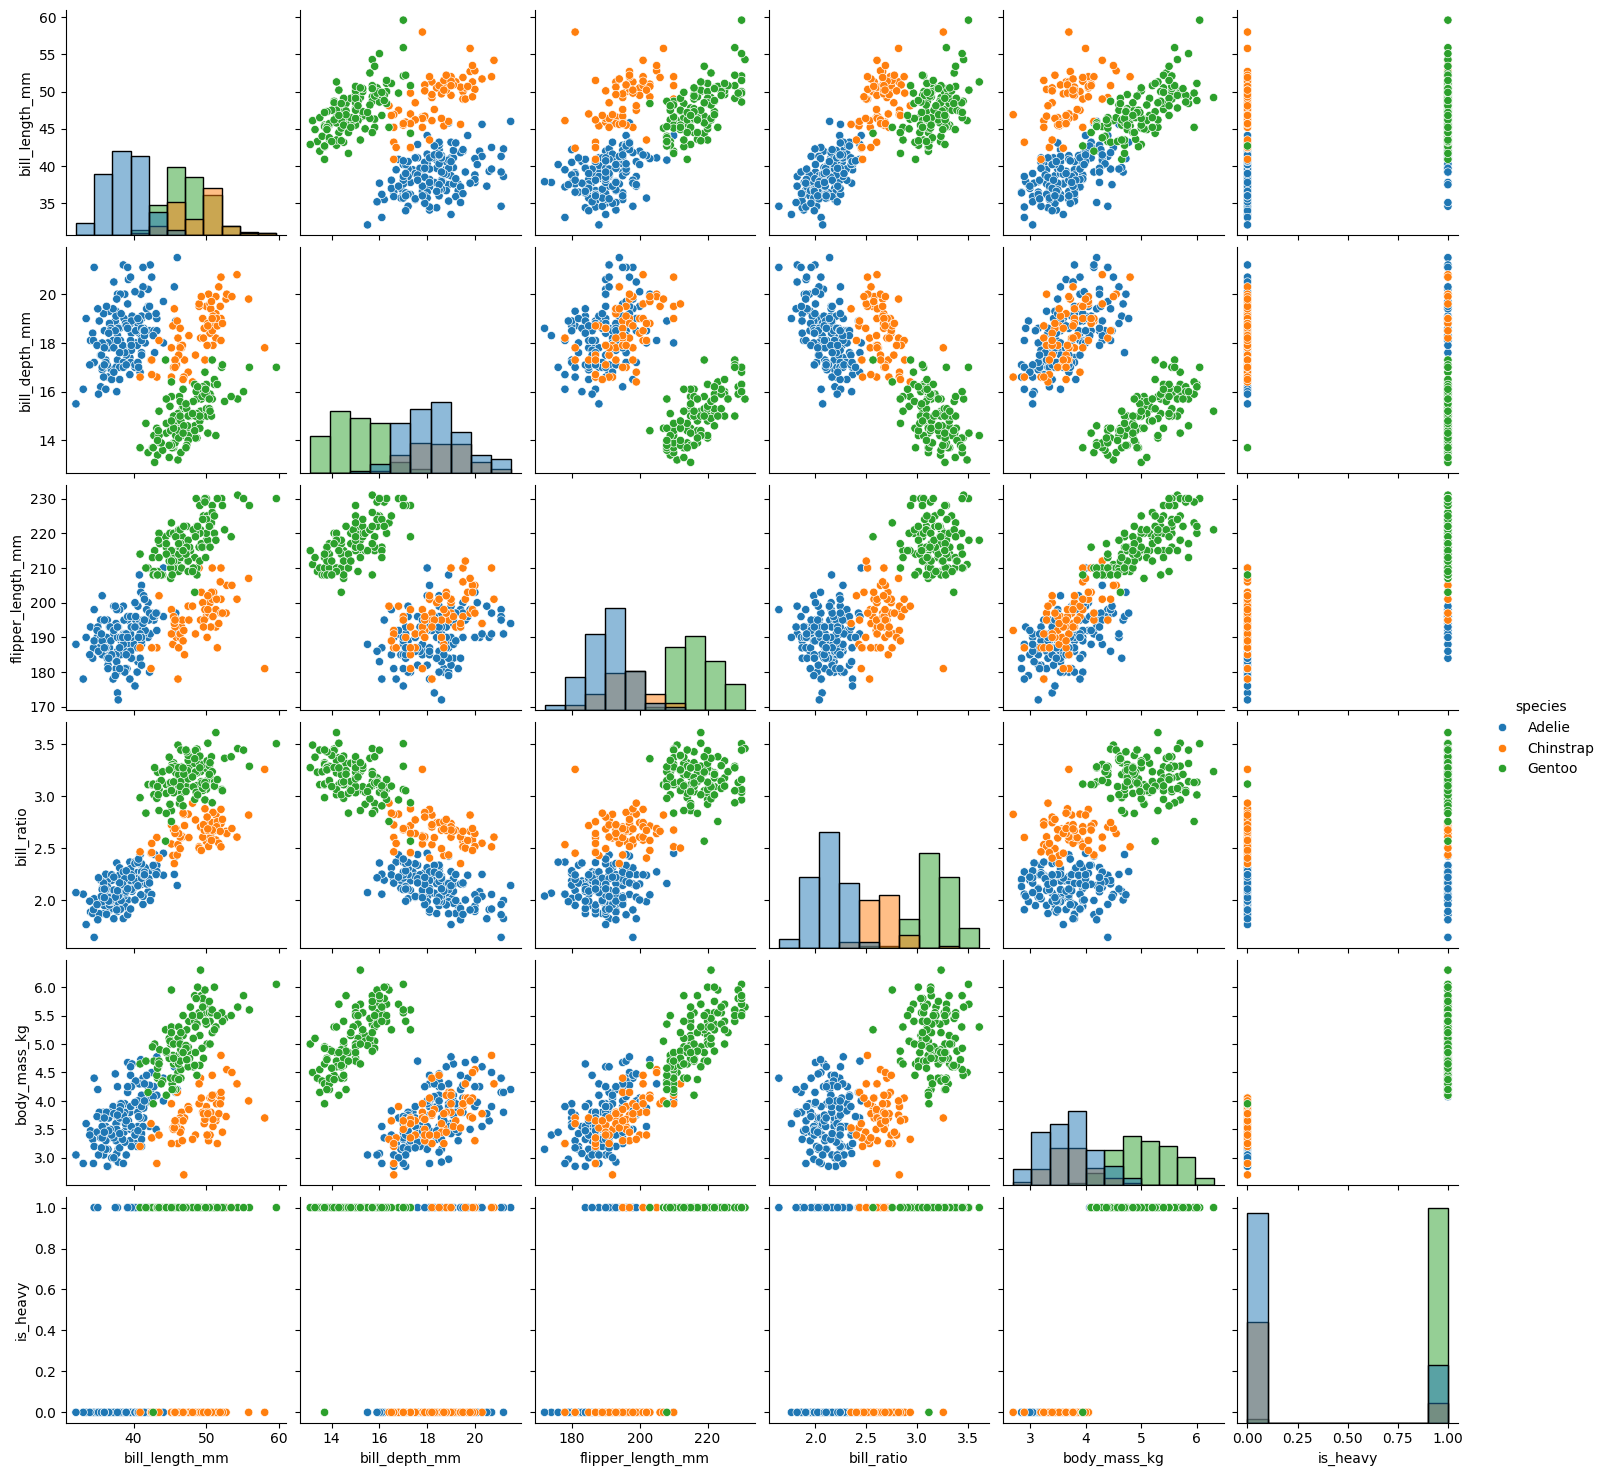

In [180]:
sns.pairplot(
    penguins_data,
    vars=num_cols.columns,
    hue="species",
    diag_kind="hist"
)
plt.show()

## 🟢 4. Очистка данных.

Под этим понимают процесс **обработки / удаления из данных “мусора”**:
- дубликатов
- выбросов (аномальных значений в данных)
- пропусков (NaN == пропуск, “Not a Number”)
- более нетривиальных вещей (например, сильно коррелирующие признаки, нестабильные по PSI (Population Stability Index), определённые бизнес-логикой, неинформативные или вызывающие утечку данных)

Также иногда к очистке относят **необходимые преобразования**:
- кодирование категориальных признаков для анализа;
- масштабирование и нормализация;
- приведение типов данных (например, для дат).


### Дубли
**Дубликаты могут вызвать переобучение модели + это как "учесть мнение одного несколько раз".**

In [181]:
penguins_data.duplicated().sum()

np.int64(0)

### Выбросы

**Выбросы могут искажать предсказания моделей - особенно, линейных. Как итог: модель будет плохо работать и на обыкновенных среднестатистических данных, так и на выбросах. Плюс выбросы иногда могут быть и вовсе ошибочными значениями."**

> Однозначно ошибочные значения точно стоит удалять из данных. В остальном рекомендуется использовать "экспертное" определение порога - но не более 5% от всех данных! Статистические методы типа IQR лучше применять с осторожностью, т.к. он склонен отрезать адекватные значения по довольно жёстким порогам.

In [182]:
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,bill_ratio,body_mass_kg,is_heavy
count,342.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,2.605649,4.201754,0.482558
std,5.459584,1.974793,14.061714,0.497375,0.801955,0.500424
min,32.100000,13.100000,172.000000,1.639810,2.700000,0.000000
25%,39.225000,15.600000,190.000000,2.160344,3.550000,0.000000
50%,44.450000,17.300000,197.000000,2.575067,4.050000,0.000000
75%,48.500000,18.700000,213.000000,3.098777,4.750000,1.000000
max,59.600000,21.500000,231.000000,3.612676,6.300000,1.000000


In [183]:
def find_iqr_outliers(df, columns, k=1.5):
    """
    Возвращает словарь с выбросами по IQR для указанных столбцов.

    df : pandas.DataFrame
    columns : list[str] — числовые признаки
    k : коэффициент IQR (обычно 1.5)
    """
    outliers = {}

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df.loc[mask, col]

    return outliers


In [184]:
outliers = find_iqr_outliers(penguins_data, num_cols)
outliers

{'bill_length_mm': Series([], Name: bill_length_mm, dtype: float64),
 'bill_depth_mm': Series([], Name: bill_depth_mm, dtype: float64),
 'flipper_length_mm': Series([], Name: flipper_length_mm, dtype: float64),
 'bill_ratio': Series([], Name: bill_ratio, dtype: float64),
 'body_mass_kg': Series([], Name: body_mass_kg, dtype: float64),
 'is_heavy': Series([], Name: is_heavy, dtype: int64)}

### Пропуски
**Пропуски `np.nan` в результате любых арифтметических операций дают тот же `np.nan`. А т.к. ML-модель - это набор математических преобразований, то и предсказание модели на данных с пропусками будет `np.nan` == бесполезный результат.**

> Способы борьбы с пропусками:
>- удалить, если их немного (и непонятно, как заполнять)
>- самый популярный способ для числовых признаков - заполнить медианой
>- самый популярный способ для категориальных признаков - заполнить модой
>- продвинутые способы с примением ML

In [185]:
penguins_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   sex                333 non-null    str    
 6   bill_ratio         342 non-null    float64
 7   body_mass_kg       342 non-null    float64
 8   is_heavy           344 non-null    int64  
dtypes: float64(5), int64(1), str(3)
memory usage: 24.4 KB


In [186]:
# числовые и категориальные признаки
num_cols = penguins_data.select_dtypes(include="number").columns
cat_cols = penguins_data.select_dtypes(exclude="number").columns

# числовые — медианой
penguins_data[num_cols] = penguins_data[num_cols].fillna(
    penguins_data[num_cols].median()
)

# категориальные — модой
penguins_data[cat_cols] = penguins_data[cat_cols].apply(
    lambda x: x.fillna(x.mode()[0])
)
penguins_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   sex                344 non-null    str    
 6   bill_ratio         344 non-null    float64
 7   body_mass_kg       344 non-null    float64
 8   is_heavy           344 non-null    int64  
dtypes: float64(5), int64(1), str(3)
memory usage: 24.4 KB


*Встроенные в sklearn классы для обработки пропусков:*

- `SimpleImputer`: базовый и самый популярный инструмент.  
  Заполняет пропуски заданной стратегией: среднее, медиана, мода или константа.

- `KNNImputer`: заполняет пропуски на основе значений ближайших объектов.  
  Учитывает локальную структуру данных, но чувствителен к масштабированию и работает медленнее.

- `IterativeImputer`: предсказывает пропуски, моделируя их как функцию других признаков.
  Даёт более точные оценки, но сложнее, медленнее и может привести к утечке информации при неправильном использовании.


In [187]:
# PS: импорты лучше делать в начале ноутбука,
# но сейчас для наглядности оставим здесь:)

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Отметим самый-корректный-формат: обычно данные разделяют на выборку для обучения модели и отдельную выборку для честного тестирования (которую модель не видела).

Для тестовой выборки имитируем полностью "боевые" условия, в т.ч. как будто значения средних/медиан и т.п. для заполнения пропусков мы рассчитывали ТОЛЬКО на тренировочной выборке, а в тестовую просто их подставили. Эта же логика относится к способам масштабирования и кодирования, с которыми мы сегодня столкнемся.

Поэтому сразу будем придерживаться хорошего тона. Технически для методов sklearn на тренировочной выборке всегда можете применять `fit_transform`, а на тестовой просто `transform`.

In [188]:
# элементарная имитация тренировочной и тестовой выборок
penguins_data_train = penguins_data.iloc[:penguins_data.shape[0] * 4 // 5]
penguins_data_test = penguins_data.iloc[penguins_data.shape[0] * 4 // 5 :]

X_train = penguins_data_train.drop("species", axis=1)
y_train = penguins_data_train["species"]

X_test = penguins_data_test.drop("species", axis=1)
y_test = penguins_data_test["species"]

In [189]:
# код для примера, т.к. пропуски мы уже заполнили
imputer = SimpleImputer(strategy='median')
X_train_filled1 = imputer.fit_transform(X_train[num_cols])
X_test_filled1 = imputer.transform(X_test[num_cols])

In [190]:
imputer = KNNImputer()
X_train_filled2 = imputer.fit_transform(X_train[num_cols])
X_test_filled2 = imputer.transform(X_test[num_cols])

In [191]:
imputer = IterativeImputer()
X_train_filled3 = imputer.fit_transform(X_train[num_cols])
X_test_filled3 = imputer.transform(X_test[num_cols])

### Мультиколлинеарность
**Про мультиколлинеарность уже отмечали - удаляем сильно коррелирующие признаки между собой, в спорных ситуациях обращаемся к таргету.**

> *Рецепт очистки от мультиколлинеарности:*
> 1. Первым делом находим очень высокие – близкие к 1, или очень низкие – близкие к -1, значения корреляции среди ПРИЗНАКОВ (порогом можно считать >0.7 или <-0.7).
> 2. Смотрим, у кого из пары выше корреляция с ТАРГЕТОМ, его и оставляем. Либо делаем более "умный" отбор признаков - но об этом позже.


In [192]:
# всё испортил нами же созданный bill_ratio + удалим body_mass_g,
# т.к. по pairplot flipper_length_mm визуально лучше разделяет таргет
# (можно это дополнительно проверить стат. тестами)
penguins_data.drop(["bill_ratio", "body_mass_kg"], axis=1, inplace=True)

In [193]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,is_heavy
0,Adelie,Torgersen,39.10,18.7,181.0,Male,0
1,Adelie,Torgersen,39.50,17.4,186.0,Female,0
2,Adelie,Torgersen,40.30,18.0,195.0,Female,0
3,Adelie,Torgersen,44.45,17.3,197.0,Male,0
4,Adelie,Torgersen,36.70,19.3,193.0,Female,0


Также мультиколлинеарность может возникать и между категориальными признаками, особенно после кодирования. Для оценки такой зависимости используют **Cramér’s V** — меру ассоциации между
двумя категориальными признаками (значения от 0 до 1).

Интепретация: если Cramér’s V >= 0.7 => признаки сильно зависимы и один из них следует удалить или агрегировать.


In [194]:
def cramers_v(x, y):
    ct = pd.crosstab(x, y) # создает таблицу сопряженности (contingency table)
    # вычисляет хи-квадрат тест для таблицы сопряженности
    chi2 = chi2_contingency(ct, correction=False)[0] 
    
    # Хи-квадрат показывает, насколько наблюдаемые частоты отличаются 
    # от ожидаемых (при независимости переменных)
    # correction=False - отключает поправку Йейтса 
    # (используется для таблиц 2×2)

    n = ct.values.sum() # Сумма всех значений в таблице сопряженности

    # r - количество строк (категорий в переменной x)
    # k - количество столбцов (категорий в переменной y)
    r, k = ct.shape

    phi2 = chi2 / n # Нормированная мера хи-квадрат
    # Показывает долю дисперсии, объясняемую связью между переменными

    # Коррекция смещения (bias correction)
    phi2_corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1)) 

    # Коррекция размеров таблицы
    r_corr = r - (r - 1) ** 2 / (n - 1)
    k_corr = k - (k - 1) ** 2 / (n - 1)

    # Финальное вычисление V Крамера
    return np.sqrt(phi2_corr / max(1, min(r_corr - 1, k_corr - 1))) 
           

***Хи-квадрат статистика (χ²) - это статистический тест, который измеряет, насколько наблюдаемые частоты отличаются от ожидаемых частот при условии независимости переменных.***
***Простая аналогия:***
***Представьте, что у вас есть мешок с разноцветными шариками: Ожидается: 50% красных, 30% синих, 20% зеленых. Вы достаете 100 шариков и получаете: 60 красных, 20 синих, 20 зелены. Хи-квадрат показывает: "Насколько сильно ваши результаты отличаются от ожидаемых?"***
***χ² = Σ [(Наблюдаемое - Ожидаемое)² / Ожидаемое]***

In [195]:
def cramers_v_matrix(df):
    cols = df.columns
    corr = pd.DataFrame(
        np.eye(len(cols)),
        index=cols,
        columns=cols
    )

    for i, col1 in enumerate(cols):
        for j in range(i + 1, len(cols)):
            value = cramers_v(df[col1], df[cols[j]])
            corr.iloc[i, j] = value
            corr.iloc[j, i] = value

    return corr

In [196]:
cramers_corr = cramers_v_matrix(penguins_data[cat_cols])
cramers_corr

,species,island,sex
species,1.000000,0.657329,0.0
island,0.657329,1.000000,0.0
sex,0.000000,0.000000,1.0


### Нестабильность, неинформативность, утечки
**PSI (Population Stability Index) — более продвинутый способ детекции признаков,
которые меняют своё распределение со временем или между выборками
(train vs validation / production)**, подробнее можете почитать, например, [здесь](https://habr.com/ru/companies/plarium/articles/515178/)).

Также бывают **неинформативные признаки - которые заведомо бесполезны для прогнозирования** (например, идентификаторы и другие признаки с повышенной уникальностью).

Отдельно важно учитывать **утечку данных (data leakage) — ситуацию, когда признак напрямую или косвенно содержит информацию о таргете или будущих событиях.** Такие признаки могут показывать отличное качество на обучении и валидации, но полностью ломать модель в production, поэтому их необходимо выявлять и удалять ещё на этапе EDA и анализа.

### Кодирование категориальных признаков

Модели машинного обучения работают только с числовыми признаками, поэтому
категориальные переменные необходимо предварительно кодировать.
Выбор метода кодирования зависит от **типа категориального признака** и **модели**.

**One-Hot Encoding (OHE)**: используется для **номинальных признаков**, у которых нет естественного порядка
(например, цвет, страна, тип объекта). Тогда для каждой категории создаётся отдельный бинарный признак.

Плюсы:
- не вводит искусственный порядок;
- корректен для линейных моделей.

Минусы:
- увеличивает размерность данных;
- плохо масштабируется при большом числе категорий.

**Ordinal / Label Encoding**

Применяется для **порядковых признаков**, где категории имеют естественный порядок (например, низкий < средний < высокий). Здесь просто категориям сопоставляются целые числа, отражающие порядок.

Отличия:
- **Ordinal encoding** сохраняет смысл порядка.
- **Label encoding** просто присваивает номера и **не должен использоваться
  для номинальных признаков**, так как навязывает ложные зависимости. Часто используется для *кодирования категориальных таргетов*.

**Target Encoding**

Более продвинутый метод кодирования категориальных признаков. Идея следующая: каждая категория заменяется статистикой по таргету
  (например, средним значением таргета для этой категории).

Плюсы:
- хорошо работает с высококардинальными признаками;
- не "раздувает" размерность данных.

Минусы:
- высокий риск **утечки данных**;
- требует аккуратной реализации (кросс-валидация, сглаживание).

> PS: бинарные признаки, состоящие только из двух категорий кодируют просто 0/1 даже если они номинальные (например, пол).
> А для таргета чаще применяют label-кодирование

In [197]:
penguins_data.describe(include=['object', 'str'])

,species,island,sex
count,344,344,344
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,179


In [198]:
# Кодирование пола (sex) через map()
penguins_data["sex"] = penguins_data["sex"].map(lambda x: 1 if x == "Male" else 0)

le = preprocessing.LabelEncoder()
penguins_data["species"] = le.fit_transform(penguins_data["species"])

In [199]:
# элементарная имитация тренировочной и тестовой выборок
penguins_data_train = penguins_data.iloc[:penguins_data.shape[0] * 4 // 5]
penguins_data_test = penguins_data.iloc[penguins_data.shape[0] * 4 // 5 :]

# Создание тренировочной и тестовой выборок
# Удаляем целевой признак и строки с пропусками для обучающего набора
X_train = penguins_data_train.drop(["species"], axis=1).dropna()
y_train = penguins_data_train["species"]

# Удаляем целевой признак и строки с пропусками для тестового набора
X_test = penguins_data_test.drop(["species"], axis=1).dropna()
y_test = penguins_data_test["species"]

In [200]:
# OneHotEncoder - преобразует категориальный признак в бинарный формат (0/1)
ohe = preprocessing.OneHotEncoder(
    sparse_output=False, 
    # sparse_output=False - возвращает плотную матрицу вместо разреженной
    handle_unknown="ignore" 
    # игнорирует неизвестные категории в тестовых данных
)

# обучаемся ТОЛЬКО на train
island_ohe_train = ohe.fit_transform(X_train[["island"]]) 
#  fit_transform - обучается и преобразует тренировочные данные
island_ohe_test = ohe.transform(X_test[["island"]]) 
# transform - преобразует тестовые данные (без переобучения!)

# названия новых признаков
ohe_columns = ohe.get_feature_names_out(["island"]) 
# get_feature_names_out - получает имена новых признаков

# превращаем в DataFrame
island_ohe_train_df = pd.DataFrame(
    island_ohe_train,
    columns=ohe_columns,
    index=X_train.index
)
island_ohe_test_df = pd.DataFrame(
    island_ohe_test,
    columns=ohe_columns,
    index=X_test.index
)
island_ohe_train_df.head()

,island_Biscoe,island_Dream,island_Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


### Масштабирование числовых признаков

Некоторые модели чувствительны к масштабу признаков, поэтому числовые признаки необходимо приводить к сопоставимому виду.

**Standard Scaling:**

$
x' = \frac{x - \mu}{\sigma}
$

Применять: линейные модели, градиентный спуск, когда признаки примерно соответствуют нормальному распределению (для признаков).

**Min-Max Scaling:**

$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$

Применять: нейросети, kNN, когда важен диапазон ([0,1]) и нет сильных выбросов (для признаков).

**Robust Scaling:**

$
x' = \frac{x - \text{median}}{Q_{75} - Q_{25}}
$

Применять: при наличии выбросов и асимметричных распределений (для признаков).

**Логарифмирование таргета:**

$
y' = \log(1 + y)
$

Применять: если таргет с длинным хвостом и экстремальными значениями (для таргета в задаче регрессии).

> PS: параметры масштабирования аналогично считаются **ДО train**, затем применяются к test.

> PPS: Для деревьев и бустингов масштабирование обычно не требуется.

In [201]:
num_cols = penguins_data_train.select_dtypes(include=["int64", 
                                                      "float64"]).columns
num_cols

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'sex', 'is_heavy'],
      dtype='str')

In [202]:
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

In [203]:
# инициализируем скейлер
# MinMaxScaler() - масштабирует признаки до диапазона [0, 1] по формуле:
# X_scaled = (X - X_min) / (X_max - X_min)
scaler = preprocessing.MinMaxScaler()

# fit только на train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


# transform на test
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,is_heavy
0,Torgersen,0.254545,0.666667,0.155172,1,0
1,Torgersen,0.269091,0.511905,0.241379,0,0
2,Torgersen,0.298182,0.583333,0.396552,0,0
3,Torgersen,0.449091,0.500000,0.431034,1,0
4,Torgersen,0.167273,0.738095,0.362069,0,0


In [204]:
# добавляем OHE-признаки обратно в данные
X_train = pd.concat(
    [X_train.drop("island", axis=1), island_ohe_train_df],
    axis=1
)

X_test = pd.concat(
    [X_test.drop("island", axis=1), island_ohe_test_df],
    axis=1
)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,is_heavy,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.155172,1,0,0.0,0.0,1.0
1,0.269091,0.511905,0.241379,0,0,0.0,0.0,1.0
2,0.298182,0.583333,0.396552,0,0,0.0,0.0,1.0
3,0.449091,0.500000,0.431034,1,0,0.0,0.0,1.0
4,0.167273,0.738095,0.362069,0,0,0.0,0.0,1.0


In [205]:
# Выше мы делили признаки на числовые и категориальные разными способами.
# Как это же можно сделать через маску? Это бывает полезно, когда признаков 
# очень много.
# Выведите таким способом числовые и категориальные признаки.
# Маски (mask) - это булевы массивы (True/False)

categorical_types = ['object', 'category', 'string']
categorical_mask = X_train.dtypes.isin(categorical_types)
numeric_mask = ~categorical_mask  

# Получаем списки признаков по маскам
numeric_features = X_train.columns[numeric_mask].tolist()
categorical_features = X_train.columns[categorical_mask].tolist()

In [206]:
print(f"Количество числовых признаков: {len(numeric_features)}")
if numeric_features:
    print(f"\nТипы данных:")
    for col in numeric_features:
        print(f"  {col}: {X_train[col].dtype}")

Количество числовых признаков: 8

Типы данных:
  bill_length_mm: float64
  bill_depth_mm: float64
  flipper_length_mm: float64
  sex: int64
  is_heavy: int64
  island_Biscoe: float64
  island_Dream: float64
  island_Torgersen: float64


In [207]:
print(f"Количество категориальных признаков: {len(categorical_features)}")

Количество категориальных признаков: 0
